In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

jacob_TM_ (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra
E, x, y = 0..30, 0..1, 0..1
box = E × x × y
using CairoMakie, GLMakie

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [128]:
time = 500; tt = 1000; tstep = 0.001
integ_set = (alg = Vern9(), adaptive = false, dt = 0.001)

(alg = Vern9(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false), lazy = true), adaptive = false, dt = 0.001)

In [171]:
I0 = -1.6782; U0 = 0.265;
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [8.254587677389917, 0.7099299111721875, 0.549798431121074]
println("last point trajectory:$u0")

ds = CoupledODEs(TM, u0, p, diffeq = integ_set)

fp, ei, _ = fixedpoints(ds, box, jacob_TM_);
Jac = jacob_TM_(fp[1], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-7 + fp[1]

ds = CoupledODEs(TM, shift, p, diffeq = integ_set)
tr, trange = trajectory(ds, time, Δt =  integ_set.dt, Ttr = 0);

last point trajectory:[8.254587677389917, 0.7099299111721875, 0.549798431121074]

In [172]:
prob = ODEProblem(TM, shift, (0.0, 5000), p)
prob_cycle = ODEProblem(TM, sol_cycle[end], (0.0, 5000), p)

ODEProblem with uType SVector{3, Float64} and tType Float64. In-place: false
timespan: (0.0, 5000.0)
u0: 3-element SVector{3, Float64} with indices SOneTo(3):
 12.465169980060793
  0.6408549330984684
  0.4471196221836829

In [173]:
sol = solve(prob, alg = Vern9(),  adaptive = true, abstol = 1e-14, reltol = 1e-14, maxiters = 10000000);
sol_cycle = solve(prob_cycle, alg = Vern9(),  adaptive = true, abstol = 1e-14, reltol = 1e-14, maxiters = 10000000);

In [170]:
u0_cycle = sol_cycle[end]

3-element SVector{3, Float64} with indices SOneTo(3):
 12.465169980060793
  0.6408549330984684
  0.4471196221836829

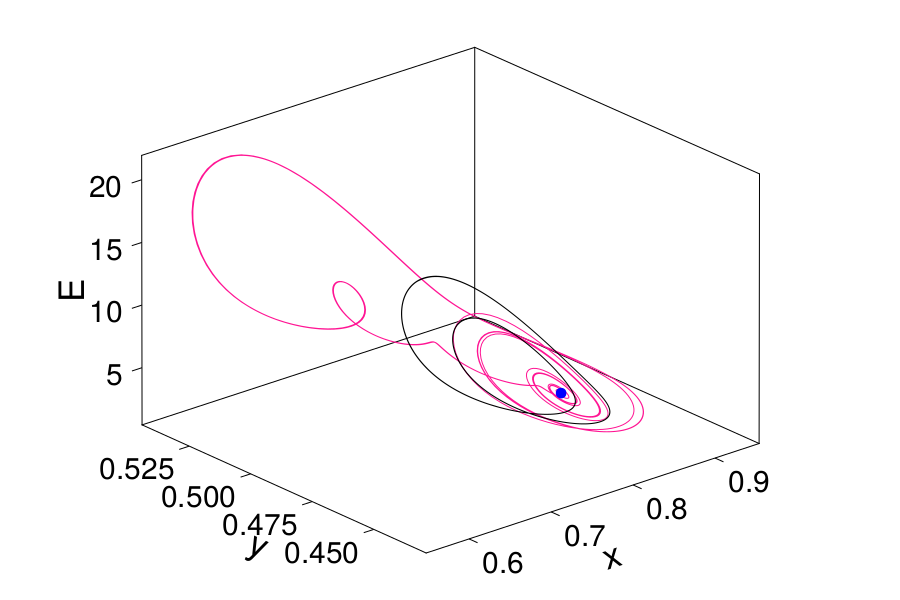

CairoMakie.Screen{IMAGE}


In [174]:
ts, tf = 1, 50000
indexx,indexy,indexz = 2, 3, 1
lb_size = 35; tck_size = 30;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)

lines!(axis3, sol[indexx, ts:tf], sol[indexy, ts:tf], sol[indexz,ts:tf], linewidth = 1.0, color = :deeppink)
lines!(axis3, sol_cycle[indexx, ts:tf], sol_cycle[indexy, ts:tf], sol_cycle[indexz,ts:tf], linewidth = 1.0, color = :black)
scatter!(axis3, fp[1][indexx], fp[1][indexy], fp[1][indexz], color = :blue, markersize = 15.0)

display(f)

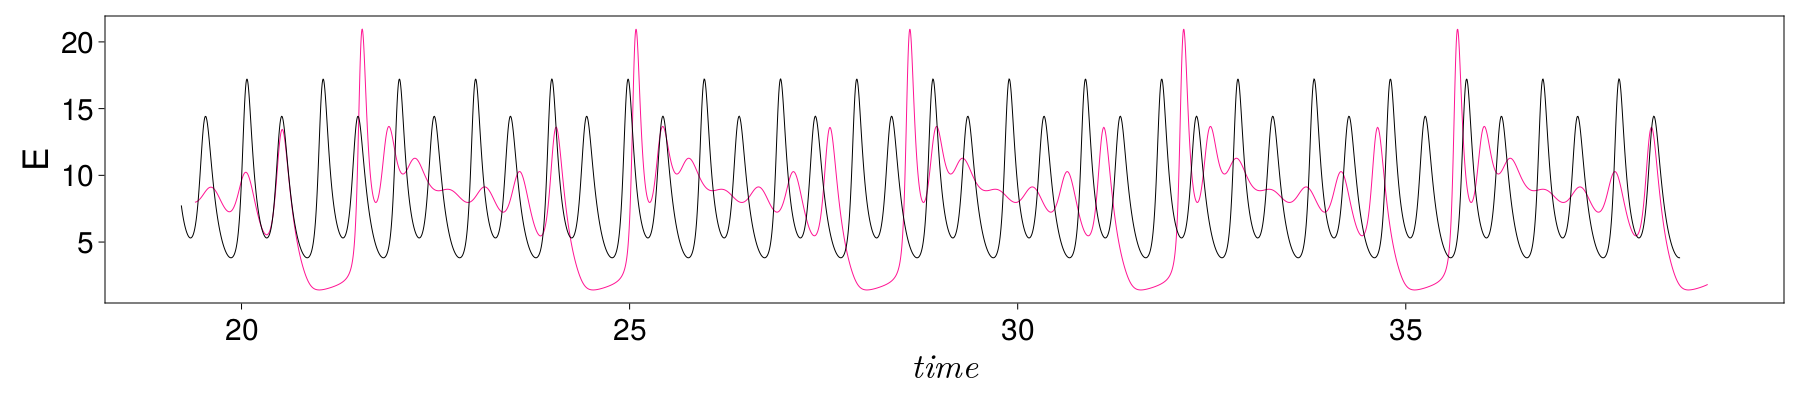

CairoMakie.Screen{IMAGE}


In [166]:
CairoMakie.activate!()
tsh, tfh = 1000, 3000
tsc, tfc = 2500, 5000
f = Figure(resolution = (1800, 400))
axis = Axis(f[1, 1], xlabel = L"time", ylabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false)
                
lines!(axis, sol.t[tsh:tfh], sol[1, tsh:tfh], linewidth = 1.0, color = :deeppink)
lines!(axis, sol_cycle.t[tsc:tfc], sol_cycle[1, tsc:tfc], linewidth = 1.0, color = :black)

display(f)